In [1]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "/home/wsx/pointcloud_research/data/nuscenes/nuscenes_gt_database/"
# files = os.listdir(path)
# cls = list(set(list(map(lambda x: x.split("_")[1], files))))

# def fun(fn):
#     cl = fn.split("_")[1]
#     with open(os.path.join(path, fn), 'r') as f:
#         points = np.fromfile(f, dtype=np.float32)
#         arr = points.reshape(-1, 5)
#         num = arr.shape[0]
#     return [cl, fn, num]


# tmp = []
# for i in tqdm(files):
#     tmp.append(fun(i))

# arr = np.array(tmp)
# df = pd.DataFrame(arr, columns=["class", "fn", "num"])
# df.to_csv("stat_gtdb.csv")

In [3]:
df = pd.read_csv("stat_gtdb.csv")
cls = list(pd.unique(df["class"]))
grouped = df.groupby("class").apply(pd.DataFrame.describe)

f = lambda x: x.sort_values(by="num", ascending=False)
grouped1 = df.groupby("class").apply(f)

In [4]:
for c in cls:
    print("-----", c)
    print(grouped.xs(c))

----- car
                 num
count  339949.000000
mean     1004.750401
std      3535.973282
min         0.000000
25%        14.000000
50%        66.000000
75%       365.000000
max     78978.000000
----- trailer
                 num
count   19202.000000
mean     2568.634361
std     10752.531031
min         0.000000
25%        53.000000
50%       234.000000
75%      1030.750000
max    135108.000000
----- motorcycle
                num
count   8846.000000
mean     400.994687
std     1118.566456
min        0.000000
25%       17.000000
50%       53.000000
75%      198.000000
max    18172.000000
----- bus
                 num
count   12286.000000
mean     3224.742146
std     11417.149290
min         0.000000
25%        46.000000
50%       206.000000
75%      1147.750000
max    127158.000000
----- barrier
                 num
count  133804.000000
mean      603.523975
std      1714.500150
min         0.000000
25%        28.000000
50%        96.000000
75%       358.000000
max     39465.000000

In [5]:
for c in cls:
    print("-----", c)
    print(grouped1.xs(c))

----- car
       class                fn    num
533294   car  13407_car_17.bin  78978
550264   car  10488_car_16.bin  78201
303360   car  10487_car_20.bin  75336
555308   car  13347_car_53.bin  73766
689609   car  13398_car_24.bin  71923
...      ...               ...    ...
238672   car  18492_car_14.bin      0
238704   car  26844_car_14.bin      0
238724   car  24587_car_27.bin      0
238749   car  24740_car_38.bin      0
226082   car  14075_car_14.bin      0

[339949 rows x 3 columns]
----- trailer
          class                    fn     num
810190  trailer   3940_trailer_17.bin  135108
656079  trailer   3939_trailer_15.bin  132474
691362  trailer   3941_trailer_15.bin  130384
448800  trailer    6358_trailer_5.bin  129327
428967  trailer    6357_trailer_6.bin  128682
...         ...                   ...     ...
14058   trailer  15291_trailer_19.bin       0
665662  trailer   3914_trailer_13.bin       0
133547  trailer  12464_trailer_23.bin       0
280722  trailer  14420_trailer_23

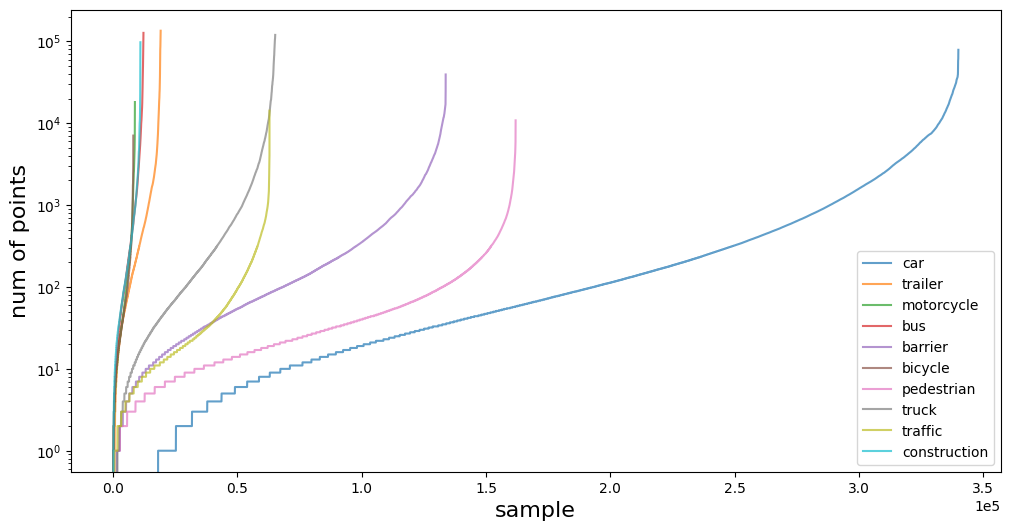

In [6]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.set_yscale("log")
ax.ticklabel_format(style="sci", axis='x', scilimits=(0, 0))
# ax.set_xscale("log")
# ax.set_xlim([6e1, 1e6])
ax.set_ylabel("num of points", fontsize=16)
ax.set_xlabel("sample", fontsize=16)
for c in cls:
    y = np.sort(grouped1.xs(f"{c}")["num"].to_numpy())
    ax.plot(y, label=f"{c}", alpha=0.7)
    ax.legend()
plt.savefig("img/num_of_points_gt.png")


In [7]:
for c in cls:
    y = np.sort(grouped1.xs(f"{c}")["num"].to_numpy())
    print(f'{c}', len(y))

car 339949
trailer 19202
motorcycle 8846
bus 12286
barrier 133804
bicycle 8185
pedestrian 161928
truck 65262
traffic 62964
construction 11050


<AxesSubplot:>

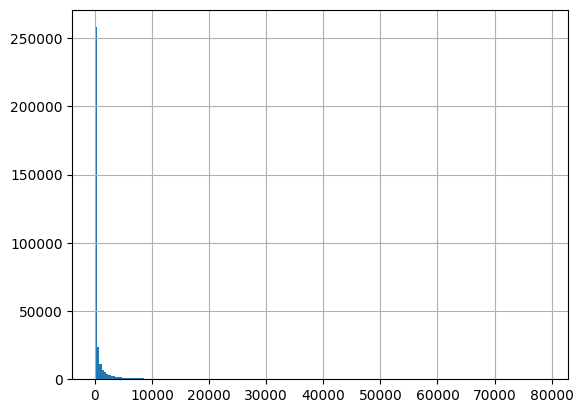

In [8]:
car = grouped1.xs("car")
car["num"].hist(bins=200)

In [9]:
car

,class,fn,num
533294,car,13407_car_17.bin,78978
550264,car,10488_car_16.bin,78201
303360,car,10487_car_20.bin,75336
555308,car,13347_car_53.bin,73766
689609,car,13398_car_24.bin,71923
...,...,...,...
238672,car,18492_car_14.bin,0
238704,car,26844_car_14.bin,0
238724,car,24587_car_27.bin,0
238749,car,24740_car_38.bin,0


In [10]:
x = car["num"].to_numpy()

In [11]:
tmp = np.zeros(len(x))
for i in x:
    tmp[i] += 1

In [12]:
tmp

array([18127.,  7188.,  6457., ...,     0.,     0.,     0.])

In [16]:
r = dict()
for i, num in enumerate(tmp):
    if num != 0:
        r[i] = num

In [28]:
tmp1 = []
for i, num in r.items():
    tmp1.append([i, num])
    print(i, num)
tmp1 = np.array(tmp1)

0 18127.0
1 7188.0
2 6457.0
3 6131.0
4 5752.0
5 5376.0
6 4921.0
7 4768.0
8 4336.0
9 4235.0
10 3846.0
11 5062.0
12 3600.0
13 3375.0
14 3303.0
15 3159.0
16 2886.0
17 2842.0
18 2766.0
19 2654.0
20 2608.0
21 2335.0
22 3022.0
23 2249.0
24 2243.0
25 2082.0
26 2113.0
27 2003.0
28 1905.0
29 1924.0
30 1851.0
31 1801.0
32 1656.0
33 2213.0
34 1611.0
35 1594.0
36 1483.0
37 1517.0
38 1404.0
39 1398.0
40 1408.0
41 1404.0
42 1326.0
43 1275.0
44 1693.0
45 1203.0
46 1266.0
47 1195.0
48 1179.0
49 1179.0
50 1148.0
51 1095.0
52 1108.0
53 1065.0
54 1037.0
55 1321.0
56 986.0
57 978.0
58 1001.0
59 919.0
60 1023.0
61 939.0
62 911.0
63 932.0
64 871.0
65 820.0
66 1038.0
67 832.0
68 853.0
69 828.0
70 817.0
71 770.0
72 770.0
73 710.0
74 721.0
75 721.0
76 718.0
77 942.0
78 684.0
79 667.0
80 706.0
81 696.0
82 702.0
83 712.0
84 664.0
85 629.0
86 620.0
87 689.0
88 794.0
89 625.0
90 616.0
91 597.0
92 604.0
93 615.0
94 600.0
95 592.0
96 597.0
97 559.0
98 544.0
99 697.0
100 539.0
101 509.0
102 502.0
103 499.0
104 527.0
